# Categorial Feature

In [1]:
%%HTML
<h3>Use One-hot Coding</h3>

In [14]:
%%HTML
<style>
p {
    font-size: 18px;
}
mark {
    color: white;
    background: teal;
    padding: 5px 8px;
    font-style: bold;
}
</style>
<body>
<p><mark>DictVectorizer</mark>: Map a Dict, transform categorical columns into one-hot coding</p>

In [8]:
data = [
    {'price' : 85, 'rooms' : 4, 'loc' : 'A'},
    {'price' : 75, 'rooms' : 3, 'loc' : 'B'},
    {'price' : 50, 'rooms' : 8, 'loc' : 'A'},
    {'price' : 75, 'rooms' : 4, 'loc' : 'C'}
]
data

[{'price': 85, 'rooms': 4, 'loc': 'A'},
 {'price': 75, 'rooms': 3, 'loc': 'B'},
 {'price': 50, 'rooms': 8, 'loc': 'A'},
 {'price': 75, 'rooms': 4, 'loc': 'C'}]

In [11]:
from sklearn.feature_extraction import DictVectorizer
model = DictVectorizer(sparse = False, dtype = int)
one_hot_coding = model.fit_transform(data)
one_hot_coding

array([[ 1,  0,  0, 85,  4],
       [ 0,  1,  0, 75,  3],
       [ 1,  0,  0, 50,  8],
       [ 0,  0,  1, 75,  4]], dtype=int32)

In [20]:
%%HTML
<p>Get The column label of one-hot coding array: use <mark>model.get_feature_names()</mark></p>

In [16]:
model.get_feature_names()

['loc=A', 'loc=B', 'loc=C', 'price', 'rooms']

In [17]:
%%HTML
<h3>A Pandas visualization</h3>

In [19]:
df = pd.DataFrame(one_hot_coding, columns = model.get_feature_names())
df

,loc=A,loc=B,loc=C,price,rooms
0,1,0,0,85,4
1,0,1,0,75,3
2,1,0,0,50,8
3,0,0,1,75,4


In [21]:
%%HTML
<h3>Set keyword: <mark>spase = True</mark> for Memory Efficiency</h3>

In [22]:
model = DictVectorizer(sparse = True, dtype = int)
feature = model.fit_transform(data)
feature

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

In [23]:
%%HTML
<h2><mark>CountVectorizer</mark>:Record the Count Frequency of Each word</h2>

In [3]:
sample = ['Problem of evil', 'evil queen', 'horizon problem']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer()
data = model.fit_transform(sample)
data

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd

df = pd.DataFrame(data.toarray(), columns = model.get_feature_names())
df.head(10)

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [10]:
%%HTML
<h2><mark>Term Frequency - Inverse Document Frequency</mark></h2>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
ans = vec.fit_transform(sample)
df = pd.DataFrame(ans.toarray(), columns = vec.get_feature_names())
df.head(10)

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Features: Data Transformation

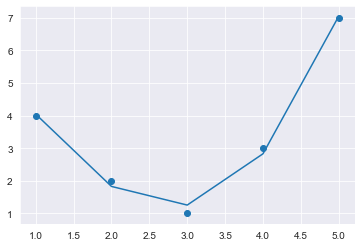

In [28]:
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid');
X = np.array([1, 2, 3, 4, 5])
X1 = X.reshape((-1,1))
y = np.array([4, 2, 1, 3, 7])

poly = PolynomialFeatures(degree = 3, include_bias=False)

X2 = poly.fit_transform(X1)

model = LinearRegression()

model.fit(X2, y)
y_pred = model.predict(X2)
plt.scatter(X, y)
plt.plot(x, y_pred)


## Handling Missing Data

In [34]:
b

In [37]:
from sklearn.preprocessing import Imputer
SimpleImputer?
handler = Imputer(strategy = 'mean', axis = 1)
X = handler.fit_transform(X)
X

Object `SimpleImputer` not found.


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## Feature Pipeline

In [38]:
%%HTML
<p>For example, we might want a processing pipeline that looks something like this:
<ul>
<li>Impute missing values using the mean</li>
<li>Transform features to quadratic</li>
<li>Fit a linear regression</li>
</ul>
</p>

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, Imputer
from sklearn.linear_model import LinearRegression

model = make_pipeline(Imputer(strategy = 'mean'), PolynomialFeatures(degree = 2), LinearRegression())


In [ ]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [39]:
model.fit(X, y)
y_pred = model.predict(X)
y_pred, y

(array([3.56069364, 1.41425819, 1.31727681, 4.04945408, 6.65831728]),
 array([4, 2, 1, 3, 7]))